In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set(style="ticks",
    rc={
        "figure.figsize": [16, 14],
        "text.color": "k",
        "axes.labelcolor": "white",
        "axes.edgecolor": "white",
        "xtick.color": "k",
        "ytick.color": "k",
        "axes.facecolor": "white",
        "figure.facecolor": "white"}
    )

In [3]:
import geopandas as gpd

In [4]:
zipcode_map = gpd.read_file('nyc_zipcode.json')

In [5]:
zipcode_map = zipcode_map.to_crs({'init': 'epsg:3395'})

In [6]:
zipcode_map['id'] = zipcode_map['id'].astype(int)

In [7]:
rel1 = pd.read_csv('A.csv', header=None)

In [8]:
rel1.columns = ['postcode', 'Asian_per', 'White_per', 'Black_per', 'Hispanic_per']

In [9]:
rel1.head()

,postcode,Asian_per,White_per,Black_per,Hispanic_per
0,10002,0.797241,0.908509,0.630327,0.601403
1,10003,0.914787,0.583333,0.797428,0.826772
2,10004,0.968235,0.927300,0.582810,0.686432
3,10006,0.711538,0.318115,0.647172,0.693291
4,10009,NaN,NaN,0.550864,0.746811


In [10]:
m1 = pd.merge(zipcode_map[['id', 'geometry']], rel1[['postcode', 'Asian_per', 'White_per', 'Black_per', 'Hispanic_per']], how='left', 
              left_on=['id'], right_on=['postcode'])

In [11]:
m1['Asian_per'] = m1['Asian_per'].fillna(0)
m1['White_per'] = m1['White_per'].fillna(0)
m1['Black_per'] = m1['Black_per'].fillna(0)
m1['Hispanic_per'] = m1['Hispanic_per'].fillna(0)

(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

<Figure size 360x432 with 0 Axes>

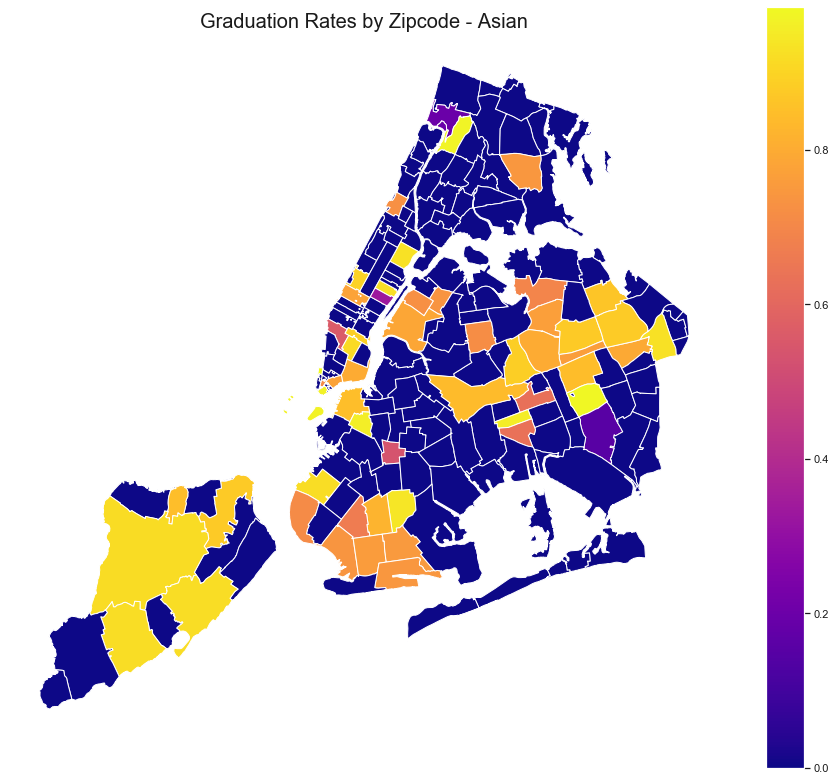

In [17]:
plt.figure(figsize=(5,6))
m1.plot(column="Asian_per", cmap="plasma", legend=True)
plt.title('Graduation Rates by Zipcode - Asian', {'fontsize':20})
plt.axis('off')

(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

<Figure size 360x432 with 0 Axes>

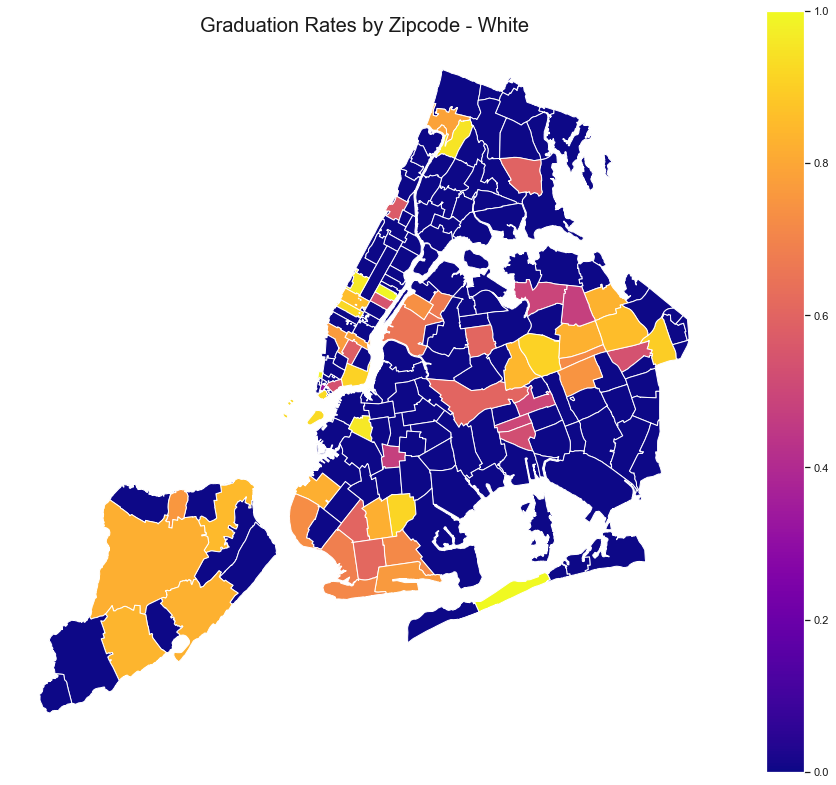

In [18]:
plt.figure(figsize=(5,6))
m1.plot(column="White_per", cmap="plasma", legend=True)
plt.title('Graduation Rates by Zipcode - White', {'fontsize':20})
plt.axis('off')

(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

<Figure size 360x432 with 0 Axes>

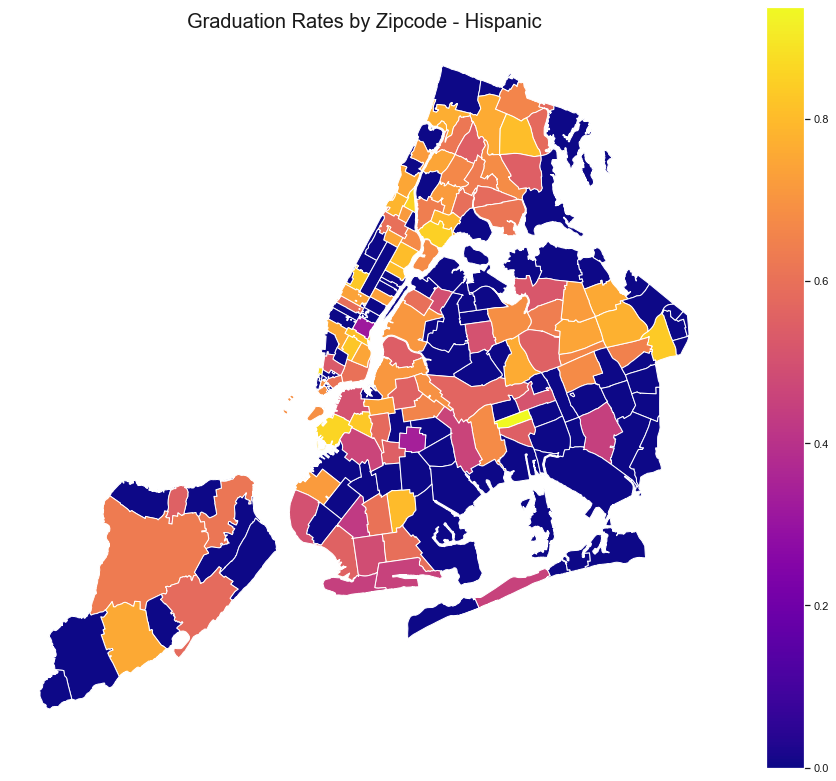

In [19]:
plt.figure(figsize=(5,6))
m1.plot(column="Hispanic_per", cmap="plasma", legend=True)
plt.title('Graduation Rates by Zipcode - Hispanic', {'fontsize':20})
plt.axis('off')

(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

<Figure size 360x432 with 0 Axes>

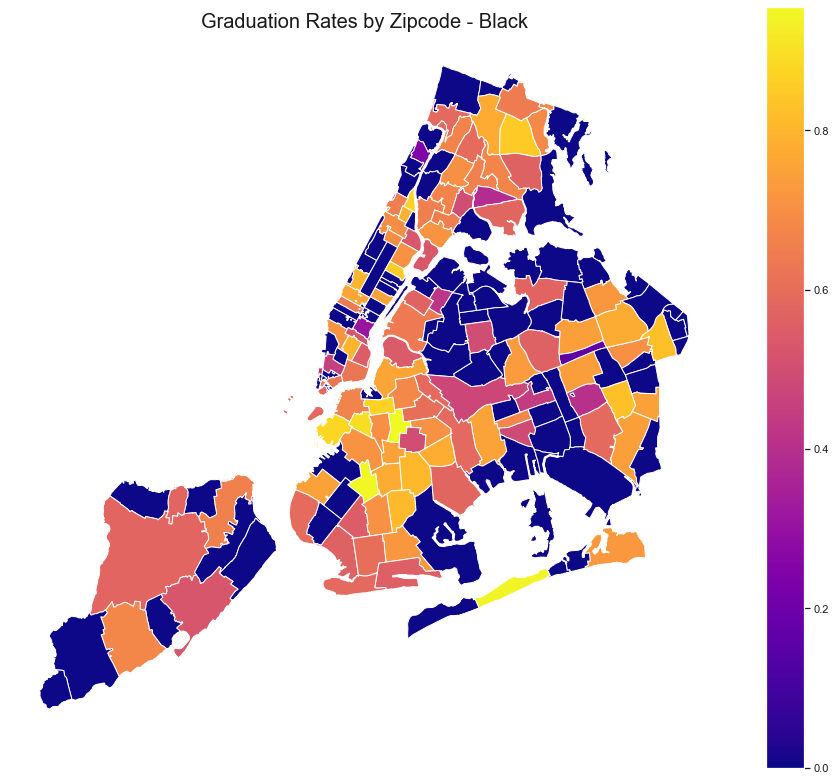

In [16]:
plt.figure(figsize=(5,6))
m1.plot(column="Black_per", cmap="plasma", legend=True)
plt.title('Graduation Rates by Zipcode - Black', {'fontsize':20})
plt.axis('off')

In [20]:
rel2 = pd.read_csv('B.csv', header=None)

In [21]:
rel2.columns = ['postcode', 'A_W', 'A_B', 'A_H', 'W_B', 'W_H', 'B_H']

In [22]:
rel2.head()

,postcode,A_W,A_B,A_H,W_B,W_H,B_H
0,10002,0.111,0.167,0.196,0.278,0.307,0.029
1,10003,0.331,0.117,0.088,0.214,0.243,0.029
2,10004,0.041,0.385,0.282,0.344,0.241,0.104
3,10006,0.393,0.064,0.018,0.329,0.375,0.046
4,10009,NaN,NaN,NaN,NaN,NaN,0.196


In [23]:
rel2 = rel2.fillna(0)

In [24]:
m2 = pd.merge(zipcode_map[['id', 'geometry']], rel2[['postcode', 'A_W', 'A_B', 'A_H', 'W_B', 'W_H', 'B_H']], how='left', 
              left_on=['id'], right_on=['postcode'])

/Users/rohanvartak/anaconda3/envs/Map/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

<Figure size 360x432 with 0 Axes>

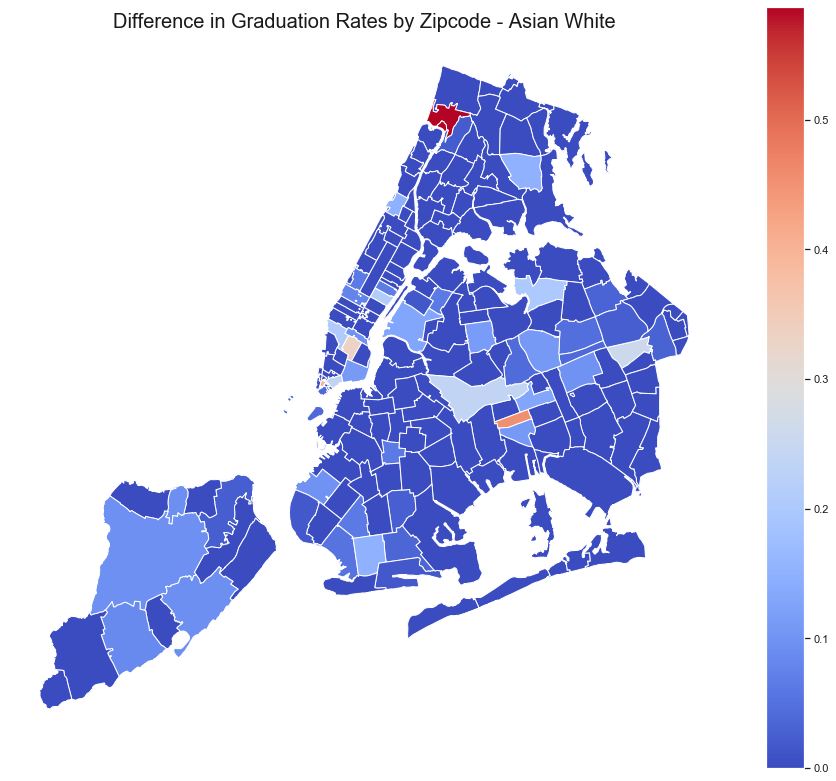

In [26]:
plt.figure(figsize=(5,6))
cmap = sns.diverging_palette(240, 10, s=99, sep=20, as_cmap=True)
m2.plot(column="A_W", cmap="coolwarm", legend=True)
plt.title('Difference in Graduation Rates by Zipcode - Asian White', {'fontsize':20})
plt.axis('off')

/Users/rohanvartak/anaconda3/envs/Map/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

<Figure size 360x432 with 0 Axes>

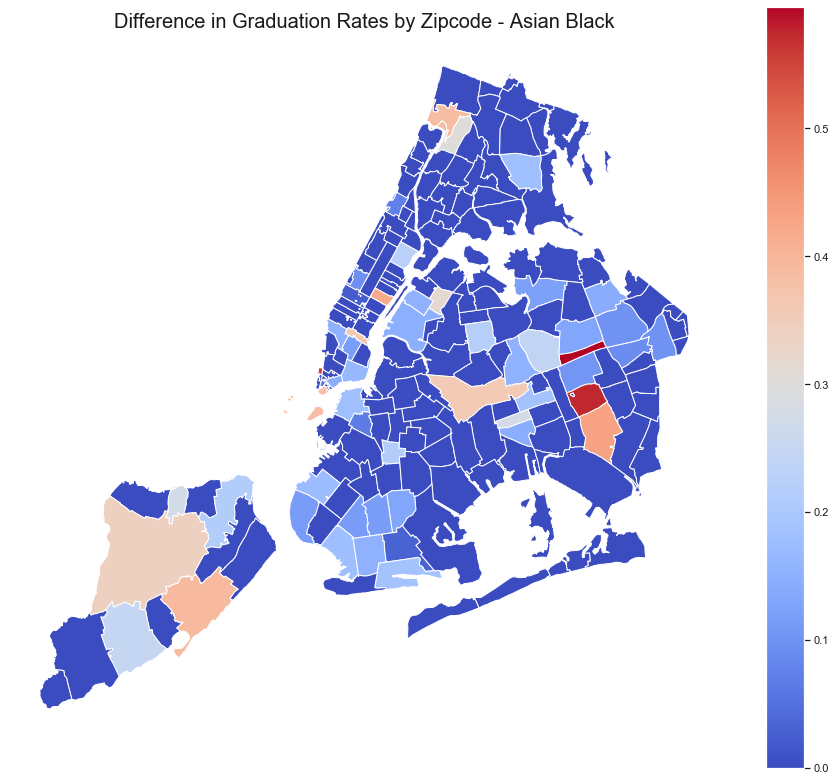

In [28]:
plt.figure(figsize=(5,6))
cmap = sns.diverging_palette(240, 10, s=99, sep=20, as_cmap=True)
m2.plot(column="A_B", cmap="coolwarm", legend=True)
plt.title('Difference in Graduation Rates by Zipcode - Asian Black', {'fontsize':20})
plt.axis('off')

/Users/rohanvartak/anaconda3/envs/Map/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

<Figure size 360x432 with 0 Axes>

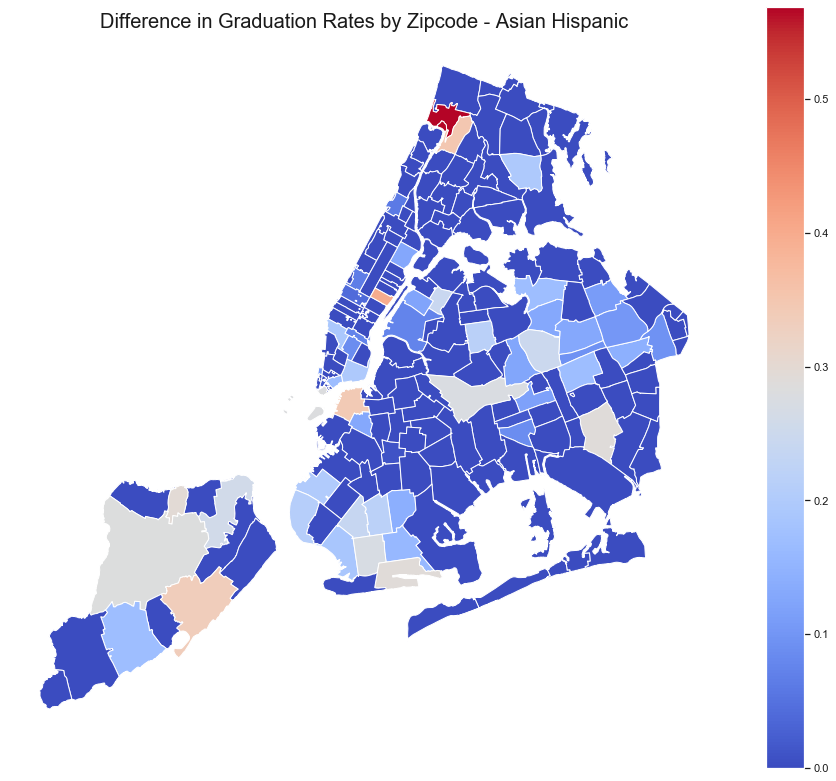

In [29]:
plt.figure(figsize=(5,6))
cmap = sns.diverging_palette(240, 10, s=99, sep=20, as_cmap=True)
m2.plot(column="A_H", cmap="coolwarm", legend=True)
plt.title('Difference in Graduation Rates by Zipcode - Asian Hispanic', {'fontsize':20})
plt.axis('off')

/Users/rohanvartak/anaconda3/envs/Map/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

<Figure size 360x432 with 0 Axes>

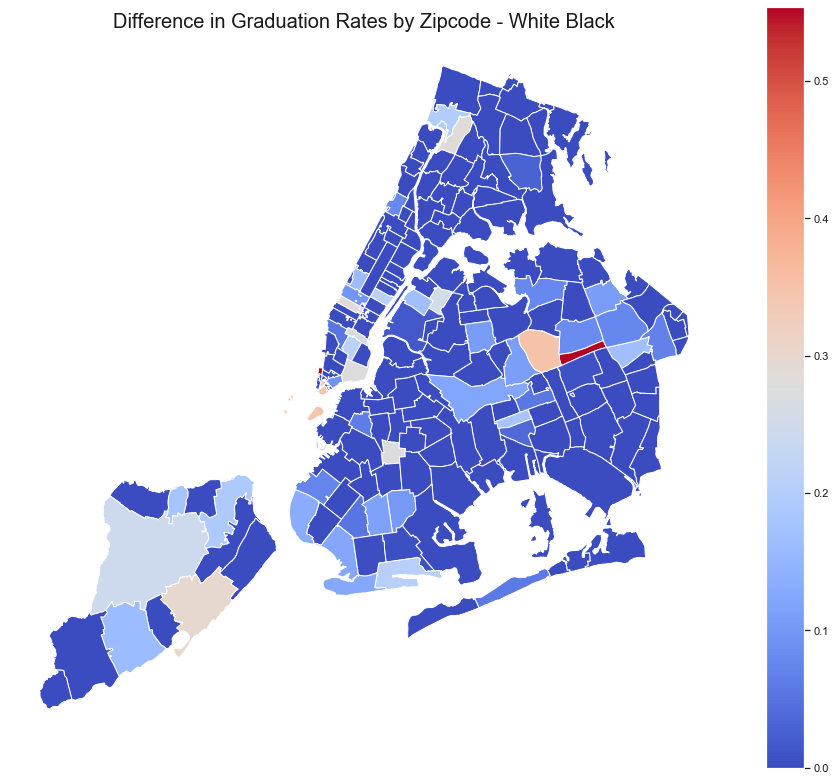

In [30]:
plt.figure(figsize=(5,6))
cmap = sns.diverging_palette(240, 10, s=99, sep=20, as_cmap=True)
m2.plot(column="W_B", cmap="coolwarm", legend=True)
plt.title('Difference in Graduation Rates by Zipcode - White Black', {'fontsize':20})
plt.axis('off')

/Users/rohanvartak/anaconda3/envs/Map/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

<Figure size 360x432 with 0 Axes>

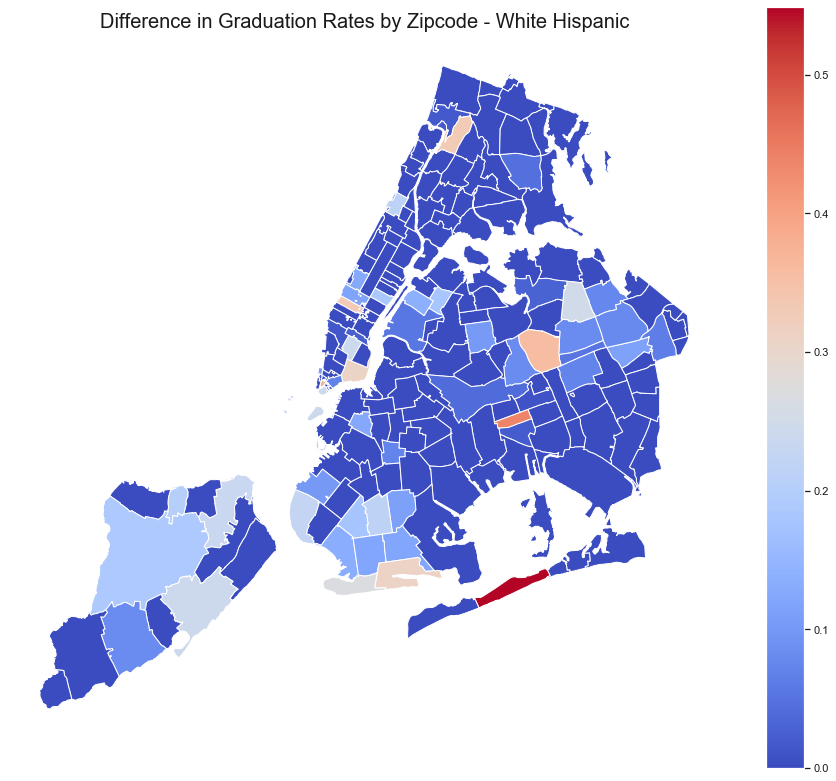

In [31]:
plt.figure(figsize=(5,6))
cmap = sns.diverging_palette(240, 10, s=99, sep=20, as_cmap=True)
m2.plot(column="W_H", cmap="coolwarm", legend=True)
plt.title('Difference in Graduation Rates by Zipcode - White Hispanic', {'fontsize':20})
plt.axis('off')

/Users/rohanvartak/anaconda3/envs/Map/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

<Figure size 360x432 with 0 Axes>

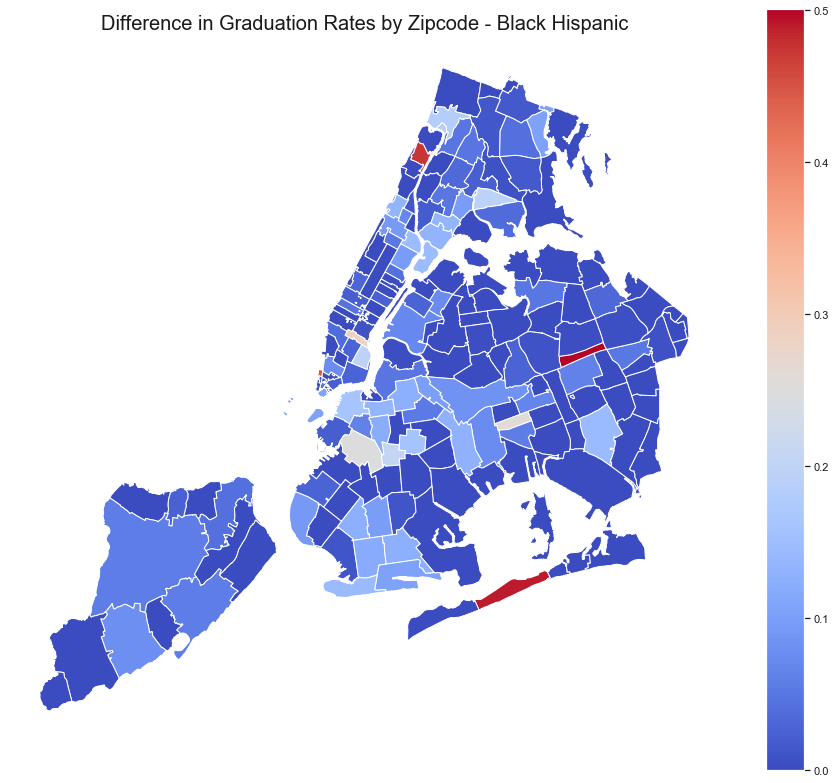

In [32]:
plt.figure(figsize=(5,6))
cmap = sns.diverging_palette(240, 10, s=99, sep=20, as_cmap=True)
m2.plot(column="B_H", cmap="coolwarm", legend=True)
plt.title('Difference in Graduation Rates by Zipcode - Black Hispanic', {'fontsize':20})
plt.axis('off')

In [34]:
rel3 = pd.read_csv('C.csv', header=None)

In [35]:
rel3.columns = ['postcode', 'g_per', 'grp']

In [36]:
rel3.head()

,postcode,g_per,grp
0,11366,0.595,A_B
1,10463,0.587,A_W
2,11433,0.576,A_B
3,10282,0.553,W_B
4,11694,0.549,W_H


In [37]:
m3 = pd.merge(zipcode_map[['id', 'geometry']], rel3[['postcode', 'g_per']], how='left', 
              left_on=['id'], right_on=['postcode'])

/Users/rohanvartak/anaconda3/envs/Map/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(-8269208.747656849, -8201107.048875266, 4907440.495224443, 4974913.816358011)

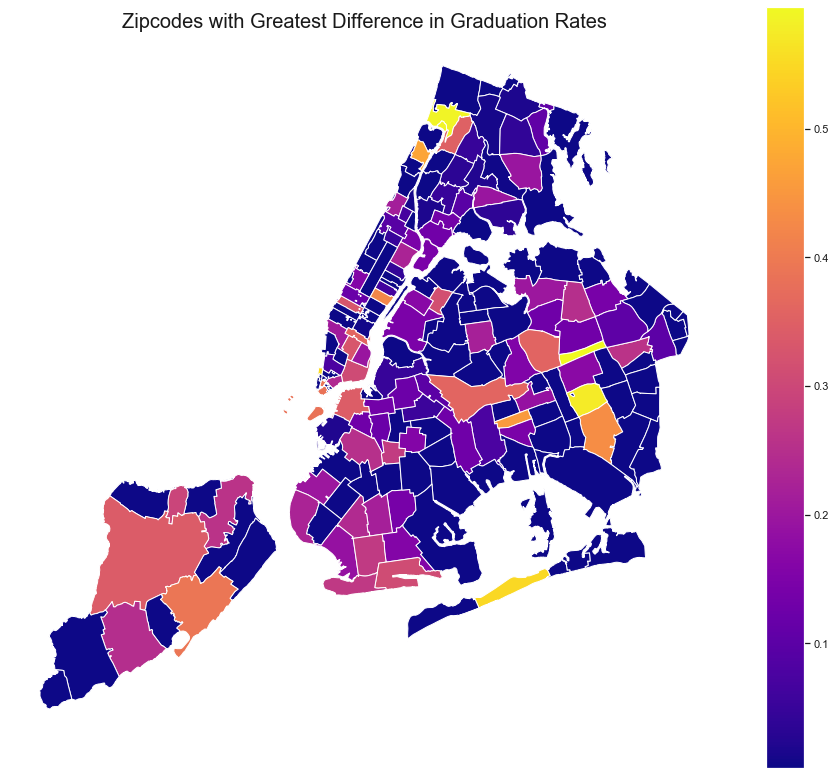

In [38]:
m3.plot(column="g_per", cmap="plasma", legend=True)
plt.title('Zipcodes with Greatest Difference in Graduation Rates', {'fontsize':20})
plt.axis('off')